# Homework 1-1

## 1-1 Training on a function

In [1]:
# Imports of Pytorch and matplotlib and other supporting modules
 
import math

import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader


### Utility functions

In [2]:
# Setting default device

if torch.cuda.is_available():
    device = 'cuda'
elif torch.backends.mps.is_available():
    device = 'mps'
else:
    device = 'cpu'

display(f'{device} is available')

dtype = torch.float
torch.set_default_device(device)

def train_loop(dataloader, model, loss_fn, optimize, epoch):
    """Training loop funciton for non-linear function"""
    model.train()
    training_loss = 0
    num_batches = len(dataloader)
    for batch, (X, y) in enumerate(dataloader):
        y_pred = model(X)
        y_pred = y_pred.unsqueeze(1)
        loss = loss_fn(y_pred, y)
        training_loss+=loss.item()

        loss.backward()
        optimize.step()
        optimize.zero_grad()
  
    training_loss /= num_batches
    return training_loss

def val_loop(dataloader, model, loss_fn, epoch):
    """Eval loop function for non-linear function"""
    model.eval()
    size= len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0,0

    with torch.no_grad():
        for X,y in dataloader:
            y_pred = model(X)
            y_pred = y_pred.unsqueeze(1)
            test_loss += loss_fn(y_pred, y).item()
            correct +=(y_pred.argmax(1) == y).type(torch.float).sum().item()
    
    test_loss /= num_batches
    correct /=size

    #if epoch % 100 == 0:
    #    display(f"Accuracy: {(100*correct)}%, Avg loss: {test_loss}")

    return test_loss

def cnt_model_params(model):
    """Count model parameters"""
    count = 0
    with torch.no_grad():
        for param in model.parameters():
            count+=param.numel()
    return count

def display_model_info(model_name, model):
    """ Display model information"""
    count = 0
    for module in model.modules():
        if isinstance(module, nn.Module):
            count+=1
    display(model)
    display(f"{model_name}. parameters: {cnt_model_params(model)}")

'cuda is available'

### Creating models

In [3]:
class CosNetwork1(nn.Module):
        """second DNN for Cosine function"""
        def __init__(self):
            super().__init__()
            self.flatten = nn.Flatten()
            self.linear_relu_stack = nn.Sequential(
                nn.Linear(1, 97),
                nn.ReLU(),
                nn.Linear(97, 98),
                nn.ReLU(),
                nn.Linear(98, 98),
                nn.ReLU(),
                nn.Linear(98, 1),
                torch.nn.Flatten(0,1)
            )
        
        def forward(self, x):
              #x=self.flatten(x)
              logits = self.linear_relu_stack(x)
              return logits
        
class CosNetwork2(nn.Module):
        """second DNN for Cosine function"""
        def __init__(self):
            super().__init__()
            self.flatten = nn.Flatten()
            self.linear_relu_stack = nn.Sequential(
                nn.Linear(1, 40),
                nn.ReLU(),
                nn.Linear(40, 80),
                nn.ReLU(),
                nn.Linear(80, 80),
                nn.ReLU(),
                nn.Linear(80, 80),
                nn.ReLU(),
                nn.Linear(80, 40),
                nn.ReLU(),
                nn.Linear(40, 1),
                torch.nn.Flatten(0,1)
            )
        
        def forward(self, x):
              #x=self.flatten(x)
              logits = self.linear_relu_stack(x)
              return logits

class CosNetwork3(nn.Module):
        """Third DNN for Cosine function"""
        def __init__(self):
            super().__init__()
            self.flatten = nn.Flatten()
            self.linear_relu_stack = nn.Sequential(
                nn.Linear(1, 138),
                nn.ReLU(),
                nn.Linear(138, 138),
                nn.ReLU(),
                nn.Linear(138, 1),
                torch.nn.Flatten(0,1)
            )
        
        def forward(self, x):
              logits = self.linear_relu_stack(x)
              return logits
        
cos_model1, cos_model2, cos_model3 = CosNetwork1(), CosNetwork2(), CosNetwork3()
        
display(cnt_model_params(nn.Linear(138, 138)), cnt_model_params(nn.Linear(120,1)))
#cos_model1, cos_model2, cos_model3 = CosNetwork(), CosNetwork2(), CosNetwork3()

display_model_info("cos_model1", cos_model1)
display_model_info("cos_model2", cos_model2)
display_model_info("cos_model3", cos_model3)


19182

121

CosNetwork1(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=1, out_features=97, bias=True)
    (1): ReLU()
    (2): Linear(in_features=97, out_features=98, bias=True)
    (3): ReLU()
    (4): Linear(in_features=98, out_features=98, bias=True)
    (5): ReLU()
    (6): Linear(in_features=98, out_features=1, bias=True)
    (7): Flatten(start_dim=0, end_dim=1)
  )
)

'cos_model1. parameters: 19599'

CosNetwork2(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=1, out_features=40, bias=True)
    (1): ReLU()
    (2): Linear(in_features=40, out_features=80, bias=True)
    (3): ReLU()
    (4): Linear(in_features=80, out_features=80, bias=True)
    (5): ReLU()
    (6): Linear(in_features=80, out_features=80, bias=True)
    (7): ReLU()
    (8): Linear(in_features=80, out_features=40, bias=True)
    (9): ReLU()
    (10): Linear(in_features=40, out_features=1, bias=True)
    (11): Flatten(start_dim=0, end_dim=1)
  )
)

'cos_model2. parameters: 19601'

CosNetwork3(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=1, out_features=138, bias=True)
    (1): ReLU()
    (2): Linear(in_features=138, out_features=138, bias=True)
    (3): ReLU()
    (4): Linear(in_features=138, out_features=1, bias=True)
    (5): Flatten(start_dim=0, end_dim=1)
  )
)

'cos_model3. parameters: 19597'

### Training & Testing Loop

In [4]:
x, x2 = torch.utils.data.random_split(torch.linspace(-math.pi, math.pi, 20000, dtype=dtype), [16000, 4000], generator=torch.Generator(device=torch.device('cuda')).manual_seed(42))
x, x2 = torch.Tensor([b for idx, b in enumerate(x.dataset) if idx in x.indices]).to(device), torch.Tensor([c for idx, c in enumerate(x2.dataset) if idx in x2.indices]).to(device)
# torch.linspace(-math.pi, math.pi, 10000, dtype=dtype)
y = torch.cos(x)
y2 = torch.cos(x2)

lossy1, lossy2, lossy3 = list(), list(), list()
epochx1, epochx2, epochx3 = list(), list(), list()

loss_fn = torch.nn.MSELoss()
epochs = 10
lr = .01
batch_size=128
optimizer1 = torch.optim.SGD(cos_model1.parameters(), lr=lr)
train_dataloader = DataLoader(TensorDataset(x.unsqueeze(1),y.unsqueeze(1)), batch_size=batch_size)
#val_dataloader = DataLoader(TensorDataset(x.unsqueeze(1),y.unsqueeze(1)), batch_size=batch_size)
val_dataloader = DataLoader(TensorDataset(x2.unsqueeze(1),y2.unsqueeze(1)), batch_size=batch_size)
patience = 20
best_val_loss = float('inf')
epochs_without_improvement = 0

display("Training & eval: cos1 model")
for epoch in range(epochs):
    test_loss = train_loop(train_dataloader, cos_model1, loss_fn, optimizer1, epoch)
    val_loss = val_loop(val_dataloader, cos_model1, loss_fn, epoch)

    if epoch % 2 == 0:
        display(f"Epoch {epoch}. Train loss: {test_loss}. Test loss: {val_loss}.")

    if epoch%2 == 0:
        epochx1.append(epoch)
        lossy1.append(test_loss)
    
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement +=1

    if epochs_without_improvement >= patience:
        display(f'Convergence reached at {epoch}')
        if epoch%2 != 0:
            epochx1.append(epoch)
            lossy1.append(test_loss)
        break
display("Done")

optimizer2 = torch.optim.SGD(cos_model2.parameters(), lr=lr)
best_val_loss = float('inf')
epochs_without_improvement = 0
display("Training & eval: cos2 model")
for epoch in range(epochs):
    test_loss = train_loop(train_dataloader, cos_model2, loss_fn, optimizer2, epoch)
    val_loss = val_loop(val_dataloader, cos_model2, loss_fn, epoch)

    if epoch % 2 == 0:
        display(f"Epoch {epoch}. Train loss: {test_loss}. Test loss: {val_loss}.")

    if epoch%2 == 0:
        epochx2.append(epoch)
        lossy2.append(test_loss)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement +=1

    if epochs_without_improvement >= patience:
        display(f'Convergence reached at {epoch}')
        if epoch%2 != 0:
            epochx2.append(epoch)
            lossy2.append(test_loss)
        break
display("Done")

optimizer3 = torch.optim.SGD(cos_model3.parameters(), lr=lr)
best_val_loss = float('inf')
epochs_without_improvement = 0
display("Training & eval: cos3 model")
for epoch in range(epochs):
    test_loss = train_loop(train_dataloader, cos_model3, loss_fn, optimizer3, epoch)
    val_loss = val_loop(val_dataloader, cos_model3, loss_fn, epoch)

    if epoch % 2 == 0:
        display(f"Epoch {epoch}. Train loss: {test_loss}. Test loss: {val_loss}.")

    if epoch%2 == 0:
        epochx3.append(epoch)
        lossy3.append(test_loss)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement +=1

    if epochs_without_improvement >= patience:
        display(f'Convergence reached at {epoch}')
        if epoch%2 != 0:
            epochx3.append(epoch)
            lossy3.append(test_loss)
        break
display("Done")

'Training & eval: cos1 model'

'Epoch 0. Train loss: 0.05916705300933063. Test loss: 0.8129024222502039.'

'Epoch 2. Train loss: 0.06098748491286187. Test loss: 0.5397749364169613.'

'Epoch 4. Train loss: 0.0026108739585683906. Test loss: 0.009802723840721228.'

'Epoch 6. Train loss: 0.0014373751696078044. Test loss: 0.010221197776445479.'

'Epoch 8. Train loss: 0.00045927709370857883. Test loss: 0.004200420429469887.'

'Done'

'Training & eval: cos2 model'

'Epoch 0. Train loss: 0.3813338956910884. Test loss: 0.48137595038861036.'

'Epoch 2. Train loss: 0.09411612332037475. Test loss: 0.47450478600148926.'

'Epoch 4. Train loss: 0.023606022970783215. Test loss: 0.14586067503205413.'

'Epoch 6. Train loss: 0.0006444956667223209. Test loss: 0.004174489428805828.'

'Epoch 8. Train loss: 0.0006166423377093225. Test loss: 0.0028897695622163155.'

'Done'

'Training & eval: cos3 model'

'Epoch 0. Train loss: 0.014918674722937453. Test loss: 1.6963020232603867.'

'Epoch 2. Train loss: 0.03665202290555583. Test loss: 0.31743730858124763.'

'Epoch 4. Train loss: 0.0003699713949614534. Test loss: 0.010883021795507375.'

'Epoch 6. Train loss: 0.0008469542662950289. Test loss: 0.009316545769706863.'

'Epoch 8. Train loss: 0.0004696885148690626. Test loss: 0.006435246149976592.'

'Done'

### Saving models

In [5]:
torch.save(cos_model1.state_dict(), 'cosmodel1_weights.pth')
torch.save(cos_model2.state_dict(), 'cosmodel2_weights.pth')
torch.save(cos_model3.state_dict(), 'cosmodel3_weights.pth')

### Plotting models

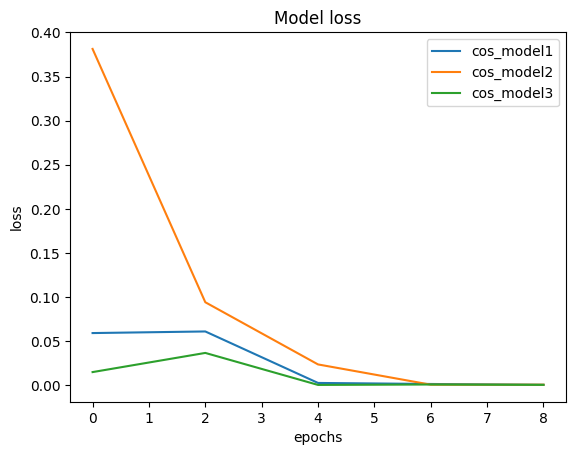

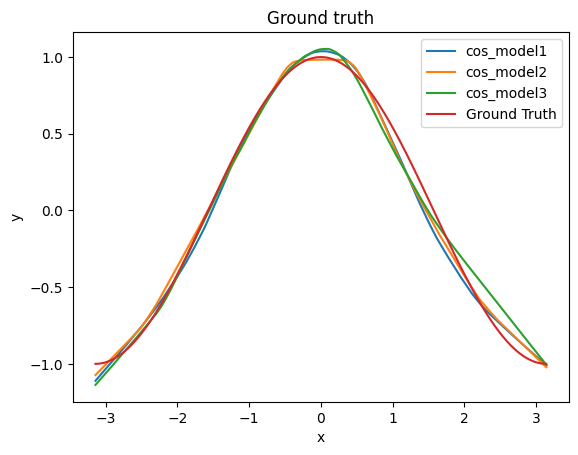

In [6]:
# Plotting model loss and ground truth for cosine neural networks
fig, ax = plt.subplots()
ax.plot(epochx1, lossy1, epochx2, lossy2, epochx3, lossy3)
ax.set(xlabel="epochs",ylabel="loss", title="Model loss")
ax.legend(labels=['cos_model1','cos_model2','cos_model3'])

fig2, ax2 = plt.subplots()
x = torch.linspace(-math.pi, math.pi, 5000, dtype=dtype)
y = torch.cos(x)

with torch.no_grad():
    m1_y = cos_model1(x.unsqueeze(1)).cpu().numpy()
    m2_y = cos_model2(x.unsqueeze(1)).cpu().numpy()
    m3_y = cos_model3(x.unsqueeze(1)).cpu().numpy()
    x = x.cpu().numpy()
    y = y.cpu().numpy()

ax2.plot(x, m1_y, x, m2_y, x, m3_y, x, y)
ax2.set(xlabel='x',ylabel='y', title='Ground truth')
ax2.legend(labels=['cos_model1', 'cos_model2','cos_model3', 'Ground Truth'])


## 1-1. Training on actual task

In [7]:
from torchvision import datasets
from torchvision.transforms import ToTensor
training_ds = datasets.MNIST(root="data", train=True, download=True, transform=ToTensor())
test_ds = datasets.MNIST(root='data', train=False, download=True, transform=ToTensor())

### Creating models

In [8]:
class NMISTNetwork1(nn.Module):
        """First CNN for NMIST"""
        def __init__(self):
            super().__init__()
            self.seq = nn.Sequential(
            nn.Conv2d(1, 32, 5), 
            nn.ReLU(),
            nn.Flatten(1), 
            nn.Linear(18432, 128),
            nn.Linear(128, 10),
            )
        
        def forward(self, x):
              output = self.seq(x)
              return output
        
class NMISTNetwork2(nn.Module):
        """Second CNN for NMIST"""
        def __init__(self):
            super().__init__()
            self.seq = nn.Sequential(
            nn.Conv2d(1, 32, 5), 
            nn.ReLU(),
            nn.Conv2d(32, 64, 5),
            nn.ReLU(),
            nn.Flatten(1), 
            nn.Linear(25600, 128),
            nn.Linear(128, 10),
            )
        
        def forward(self, x):
              output = self.seq(x)
              return output
        
class NMISTNetwork3(nn.Module):
        """Third CNN for NMIST"""
        def __init__(self):
            super().__init__()
            self.seq = nn.Sequential(
            nn.Conv2d(1, 32, 5), 
            nn.ReLU(),
            nn.Conv2d(32, 64, 5),
            nn.Dropout(.25),
            nn.ReLU(),
            nn.Conv2d(64, 64, 5),
            nn.Flatten(1), 
            nn.Linear(16384, 128),
            nn.ReLU(),
            nn.Linear(128, 10),
            )
        
        def forward(self, x):
              output = self.seq(x)
              return output
        

nmist1, nmist2, nmist3 = NMISTNetwork1(), NMISTNetwork2(), NMISTNetwork3()
display_model_info('nmist1', nmist1)
display_model_info('nmist2', nmist2)
display_model_info('nmist3', nmist3)

NMISTNetwork1(
  (seq): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Flatten(start_dim=1, end_dim=-1)
    (3): Linear(in_features=18432, out_features=128, bias=True)
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)

'nmist1. parameters: 2361546'

NMISTNetwork2(
  (seq): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
    (3): ReLU()
    (4): Flatten(start_dim=1, end_dim=-1)
    (5): Linear(in_features=25600, out_features=128, bias=True)
    (6): Linear(in_features=128, out_features=10, bias=True)
  )
)

'nmist2. parameters: 3330314'

NMISTNetwork3(
  (seq): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
    (3): Dropout(p=0.25, inplace=False)
    (4): ReLU()
    (5): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1))
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=16384, out_features=128, bias=True)
    (8): ReLU()
    (9): Linear(in_features=128, out_features=10, bias=True)
  )
)

'nmist3. parameters: 2253130'

### Utility functions

In [9]:
def nmist_train_loop(dataloader, model, loss_fn, optimize, epoch):
    """Training loop funciton for non-linear function"""
    model.train()
    num_batches = len(dataloader)
    train_loss, correct = 0,0
    size = len(dataloader.dataset)

    for batch, (X, y) in enumerate(dataloader):
        X = X.to(device)
        optimize.zero_grad()
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        correct += (y_pred.argmax(dim=1) == y).type(torch.float).sum().item()

        loss.backward()
        optimize.step()
    
    train_loss /= num_batches
    correct /=size

    if epoch % 10 == 0:
        display(f"Epoch {epoch}. Accuracy: {(100*correct)}%, Avg loss: {train_loss}")

    return train_loss, correct
        
def nmist_val_loop(dataloader, model, loss_fn, epoch):
    """Eval loop function for non-linear function"""
    model.eval()
    size= len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0,0

    with torch.no_grad():
        for X,y in dataloader:
            X = X.to(device)
            y_pred = model(X)
            test_loss += loss_fn(y_pred, y).item()
            correct += (y_pred.argmax(dim=1) == y).type(torch.float).sum().item()
    
    test_loss /= num_batches
    correct /=size

#    if epoch % 10 == 0:
#        display(f"Epoch {epoch}. Accuracy: {(100*correct)}%, Avg loss: {test_loss}")

    return test_loss, correct

### Training and Testing Loop

In [10]:
lossy1, lossy2, lossy3 = list(), list(), list()
epochx1, epochx2, epochx3 = list(), list(), list()
accy1, accy2, accy3 = list(), list(), list()

loss_fn = torch.nn.CrossEntropyLoss()
epochs = 30
lr = 1.5e-2
batch_size=150

training_dl = DataLoader(training_ds, batch_size=batch_size)
test_dl = DataLoader(test_ds, batch_size=batch_size)

patience = 5
best_val_loss = float('inf')
epochs_without_improvement = 0

optimizer1 = torch.optim.SGD(nmist1.parameters(), lr=lr)
display("Training & eval: nmist1 model")
for epoch in range(epochs):
    test_loss, correct = nmist_train_loop(training_dl, nmist1, loss_fn, optimizer1, epoch)
    val_loss, _ = nmist_val_loop(test_dl, nmist1, loss_fn, epoch)

    if epoch%2 == 0:
        epochx1.append(epoch)
        lossy1.append(test_loss)
        accy1.append(correct)
    
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement +=1

    if epochs_without_improvement >= patience:
        display(f'Convergence reached at {epoch}')
        if epoch%2 !=0:
            epochx1.append(epoch)
            lossy1.append(test_loss)
            accy1.append(correct)
        break
display("Done")

optimizer2 = torch.optim.SGD(nmist2.parameters(), lr=lr)
best_val_loss = float('inf')
epochs_without_improvement = 0
display("Training & eval: nmist2 model")
for epoch in range(epochs):
    test_loss, correct = nmist_train_loop(training_dl, nmist2, loss_fn, optimizer2, epoch)
    val_loss, _ = nmist_val_loop(test_dl, nmist2, loss_fn, epoch)

    if epoch%2 == 0:
        epochx2.append(epoch)
        lossy2.append(test_loss)
        accy2.append(correct)

    if val_loss < best_val_loss:
        best_val_loss = test_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement +=1

    if epochs_without_improvement >= patience:
        display(f'Convergence reached at {epoch}')
        if epoch%2 != 0:
            epochx2.append(epoch)
            lossy2.append(test_loss)
            accy2.append(correct)
        break
display("Done")

optimizer3 = torch.optim.SGD(nmist3.parameters(), lr=lr)
best_val_loss = float('inf')
epochs_without_improvement = 0
display("Training & eval: nmist3 model")
for epoch in range(epochs):
    test_loss, correct = nmist_train_loop(training_dl, nmist3, loss_fn, optimizer3, epoch)
    val_loss, _ = nmist_val_loop(test_dl, nmist3, loss_fn, epoch)

    if epoch%2 == 0:
        epochx3.append(epoch)
        lossy3.append(test_loss)
        accy3.append(correct)

    if val_loss < best_val_loss:
        best_val_loss = test_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement +=1

    if epochs_without_improvement >= patience:
        display(f'Convergence reached at {epoch}')
        if epoch%2 != 0:
            epochx3.append(epoch)
            lossy3.append(test_loss)
            accy3.append(correct)
        break
display("Done")

'Training & eval: nmist1 model'

'Epoch 0. Accuracy: 86.07833333333333%, Avg loss: 0.5588936773687601'

'Epoch 10. Accuracy: 96.62166666666666%, Avg loss: 0.12234938311157748'

'Epoch 20. Accuracy: 98.245%, Avg loss: 0.06317609088611789'

'Done'

'Training & eval: nmist2 model'

'Epoch 0. Accuracy: 82.66833333333334%, Avg loss: 0.6472399408742785'

'Epoch 10. Accuracy: 98.21833333333333%, Avg loss: 0.06141073480306659'

'Epoch 20. Accuracy: 98.96166666666667%, Avg loss: 0.03735702975609456'

'Convergence reached at 21'

'Done'

'Training & eval: nmist3 model'

'Epoch 0. Accuracy: 78.39333333333333%, Avg loss: 0.7217119159922004'

'Epoch 10. Accuracy: 98.35166666666667%, Avg loss: 0.053423893092549406'

'Convergence reached at 12'

'Done'

### Save models

In [11]:
torch.save(nmist1.state_dict(), 'nmist1_weights.pth')
torch.save(nmist2.state_dict(), 'nmist2_weights.pth')
torch.save(nmist3.state_dict(), 'nmist3_weights.pth')

### Plotting Models

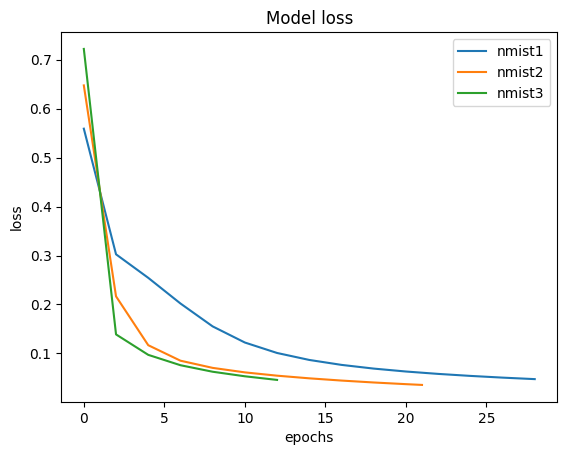

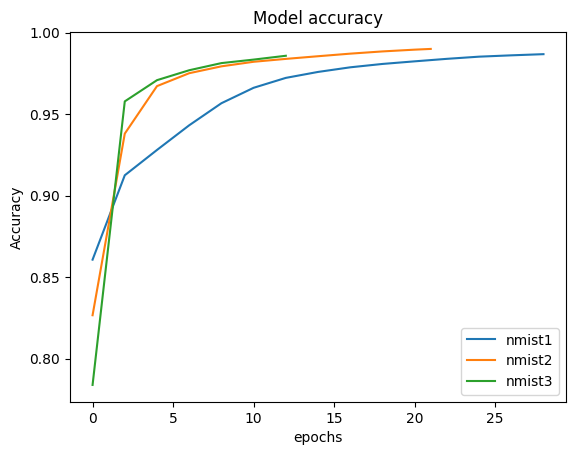

In [12]:
fig, ax = plt.subplots()
ax.plot(epochx1, lossy1, epochx2, lossy2, epochx3, lossy3)
ax.set(xlabel="epochs",ylabel="loss", title="Model loss")
ax.legend(labels=['nmist1','nmist2','nmist3'])

fig2, ax2 = plt.subplots()
x = torch.linspace(-math.pi, math.pi, 5000, dtype=dtype)
y = torch.cos(x)

ax2.plot(epochx1, accy1, epochx2, accy2, epochx3, accy3)
ax2.set(xlabel='epochs',ylabel='Accuracy', title='Model accuracy')
ax2.legend(labels=['nmist1', 'nmist2','nmist3'])
